In [1]:
# Import the libraries we need for this lab
# Using the following line code to install the torchvision library
# !conda install -y torchvision
# PyTorch Library
import torch
# PyTorch Neural Network
import torch.nn as nn
# Allows us to transform data
import torchvision.transforms as transforms
# Allows us to get the digit dataset
import torchvision.datasets as dsets
# Creating graphs
import matplotlib.pylab as plt
# Allows us to use arrays to manipulate and store data
import numpy as np

In [4]:
# The function to plot parameters
def PlotParameters(model):
 W = model.state_dict()['linear.weight'].data
 w_min = W.min().item()
 w_max = W.max().item()
 fig, axes = plt.subplots(2, 5)
 fig.subplots_adjust(hspace=0.01, wspace=0.1)
 for i, ax in enumerate(axes.flat):
   if i < 10:
     # Set the label for the sub-plot.
     ax.set_xlabel("class: {0}".format(i))
     # Plot the image.
     ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')
     ax.set_xticks([])
     ax.set_yticks([])
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
plt.show()

In [12]:
# Plot the data
def show_data(data_sample):
 plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
 plt.title('y = ' + str(data_sample[1]))

# **Make Some Data**

In [8]:
# Create and print the training dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [10]:
# Create and print the validation dataset
validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Print the validation dataset:\n ", validation_dataset)

Print the validation dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


First Image and Label None


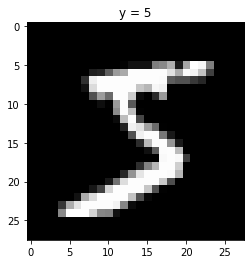

In [13]:
# Print the first image and label
print("First Image and Label", show_data(train_dataset[0]))

In [14]:
# Print the label
print("The label: ", train_dataset[3][1])

The label:  1


The image:  None


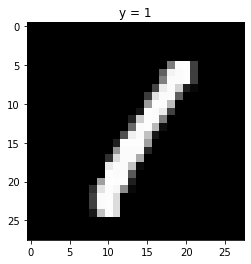

In [15]:
# Plot the image
print("The image: ", show_data(train_dataset[3]))

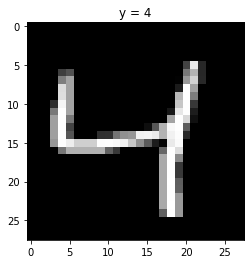

In [16]:
# Plot the image
show_data(train_dataset[2])

# **Build a Softmax Classifer**

In [17]:
# Define softmax classifier class
# Inherits nn.Module which is the base class for all neural networks
class SoftMax(nn.Module):

 # Constructor
 def __init__(self, input_size, output_size):
   super(SoftMax, self).__init__()
   # Creates a layer of given input size and output size
   self.linear = nn.Linear(input_size, output_size)

 # Prediction
 def forward(self, x):
   # Runs the x value through the single layers defined above
   z = self.linear(x)
   return z

In [18]:
# Print the shape of the training dataset
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [19]:
# Set input size and output size
input_dim = 28 * 28
output_dim = 10

# **Define the Softmax Classifier, Criterion Function,Optimizer, and Train the Model**

In [20]:
# Create the model
# Input dim is 28*28 which is the image converted to a tensor
# Output dim is 10 because there are 10 possible digits the image can be
model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [21]:
# Print the parameters
print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


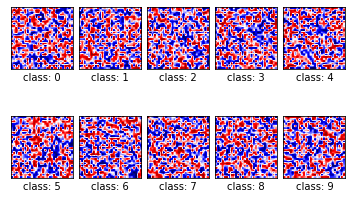

In [22]:
# Plot the model parameters for each class
# Since the model has not been trained yet the parameters look random
PlotParameters(model)

In [23]:
# First we get the X value of the first image
X = train_dataset[0][0]
# We can see the shape is 1 by 28 by 28, we need it to be flattened to 1 by 28 * 2print(X.shape)
X = X.view(-1, 28*28)
print(X.shape)
# Now we can make a prediction, each class has a value, and the higher it is the mmodel(X)

torch.Size([1, 784])


In [28]:
# Define the learning rate, optimizer, criterion, and data loader
learning_rate = 0.1
# The optimizer will updates the model parameters using the learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# The criterion will measure the loss between the prediction and actual label valu# This is where the SoftMax occurs, it is built into the Criterion Cross Entropy L
criterion = nn.CrossEntropyLoss()
# Created a training data loader so we can set the batch size
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
# Created a validation data loader so we can set the batch size
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

# **How Cross Entropy Loss uses SoftMax**

Output:  tensor([[-0.0228, -0.0561, -0.2897,  0.0235, -0.1362,  0.0754, -0.2517,  0.1807,
          0.0383, -0.3969]], grad_fn=<AddmmBackward0>)
Actual: tensor([5])


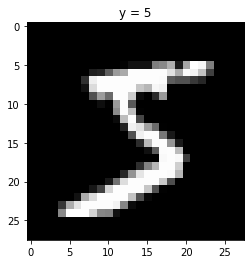

In [29]:
model_output = model(X)
actual = torch.tensor([train_dataset[0][1]])
show_data(train_dataset[0])
print("Output: ", model_output)
print("Actual:", actual)

In [30]:
criterion(model_output, actual)

tensor(2.1581, grad_fn=<NllLossBackward0>)

In [31]:
softmax = nn.Softmax(dim=1)
probability = softmax(model_output)
print(probability)

tensor([[0.1047, 0.1013, 0.0802, 0.1097, 0.0935, 0.1155, 0.0833, 0.1284, 0.1113,
         0.0720]], grad_fn=<SoftmaxBackward0>)


In [32]:
-1*torch.log(probability[0][actual])

tensor([2.1581], grad_fn=<MulBackward0>)

# **Train The Model**

In [54]:
# Number of times we train our model useing the training data
n_epochs = 10
# Lists to keep track of loss and accuracy
loss_list = []
accuracy_list = []
# Size of the validation data
N_test = len(validation_dataset)
# Function to train the model based on number of epochs
def train_model(n_epochs):
 # Loops n_epochs times
 for epoch in range(n_epochs):
   # For each batch in the train loader
   for x, y in train_loader:
     # Resets the calculated gradient value, this must be done each time as 
     optimizer.zero_grad()
     # Makes a prediction based on the image tensor
     z = model(x.view(-1, 28 * 28))
     # Calculates loss between the model output and actual class
     loss = criterion(z, y)
     # Calculates the gradient value with respect to each weight and bias
     loss.backward()
     # Updates the weight and bias according to calculated gradient value
     optimizer.step()

 # Each epoch we check how the model performs with data it has not seen whi 
 correct = 0
 # For each batch in the validation loader
 for x_test, y_test in validation_loader:
   # Makes prediction based on image tensor
   z = model(x_test.view(-1, 28 * 28))
 # Finds the class with the higest output
 _, yhat = torch.max(z.data, 1)
 # Checks if the prediction matches the actual class and increments cor 
 correct += (yhat == y_test).sum().item()
 # Calculates the accuracy by dividing correct by size of validation datase 
 accuracy = correct / N_test
 # Keeps track loss
 loss_list.append(loss.data)
 # Keeps track of the accuracy
 accuracy_list.append(accuracy)
# Function call
train_model(n_epochs)

# **Analyze Results**

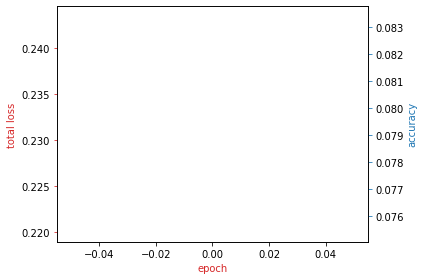

In [55]:
# Plot the loss and accuracy
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

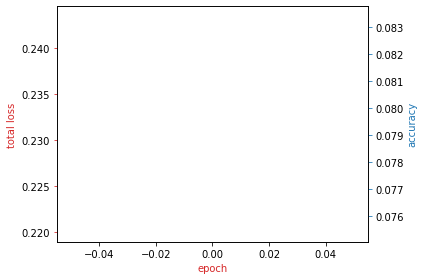

In [56]:
# Plot the loss and accuracy
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

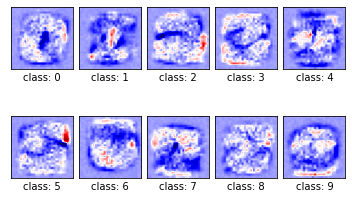

In [57]:
# Plot the parameters
PlotParameters(model)

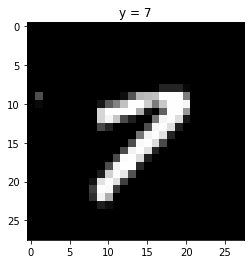

yhat: tensor([1])
probability of class  0.46783703565597534


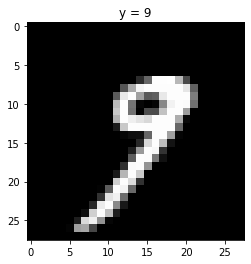

yhat: tensor([7])
probability of class  0.523440957069397


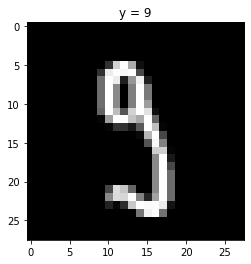

yhat: tensor([5])
probability of class  0.7203633189201355


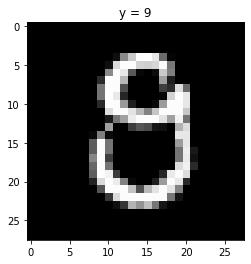

yhat: tensor([8])
probability of class  0.5721984505653381


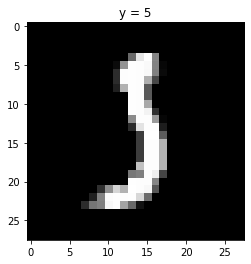

yhat: tensor([3])
probability of class  0.7796816825866699


In [58]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
 z = model(x.reshape(-1, 28 * 28))
 _, yhat = torch.max(z, 1)
 if yhat != y:
   show_data((x, y))
   plt.show()
   print("yhat:", yhat)
   print("probability of class ", torch.max(Softmax_fn(z)).item())
   count += 1
 if count >= 5:
   break 

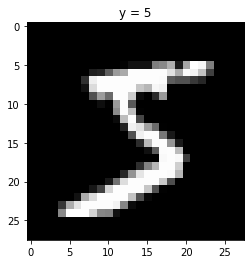

yhat: tensor([5])
probability of class  0.8397533893585205


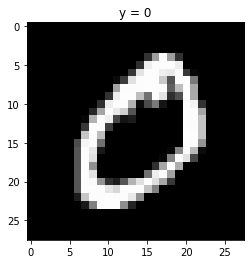

yhat: tensor([0])
probability of class  0.9999688863754272


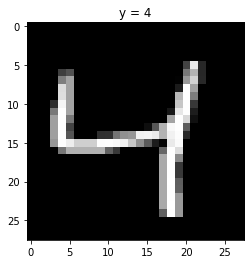

yhat: tensor([4])
probability of class  0.7681818604469299


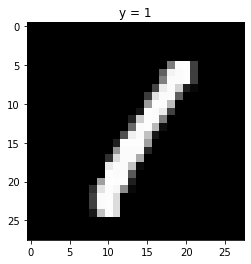

yhat: tensor([1])
probability of class  0.9723848104476929


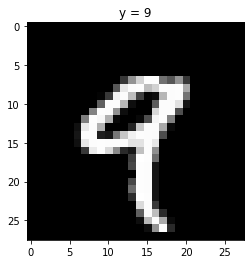

yhat: tensor([9])
probability of class  0.9576820135116577


In [59]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
 z = model(x.reshape(-1, 28 * 28))
 _, yhat = torch.max(z, 1)
 if yhat == y:
   show_data((x, y))
   plt.show()
   print("yhat:", yhat)
   print("probability of class ", torch.max(Softmax_fn(z)).item())
   count += 1
 if count >= 5:
   break